In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.drop(['ocean_proximity'], axis=1, inplace=True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [5]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [7]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
df.shape

(20640, 9)

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

Visualization

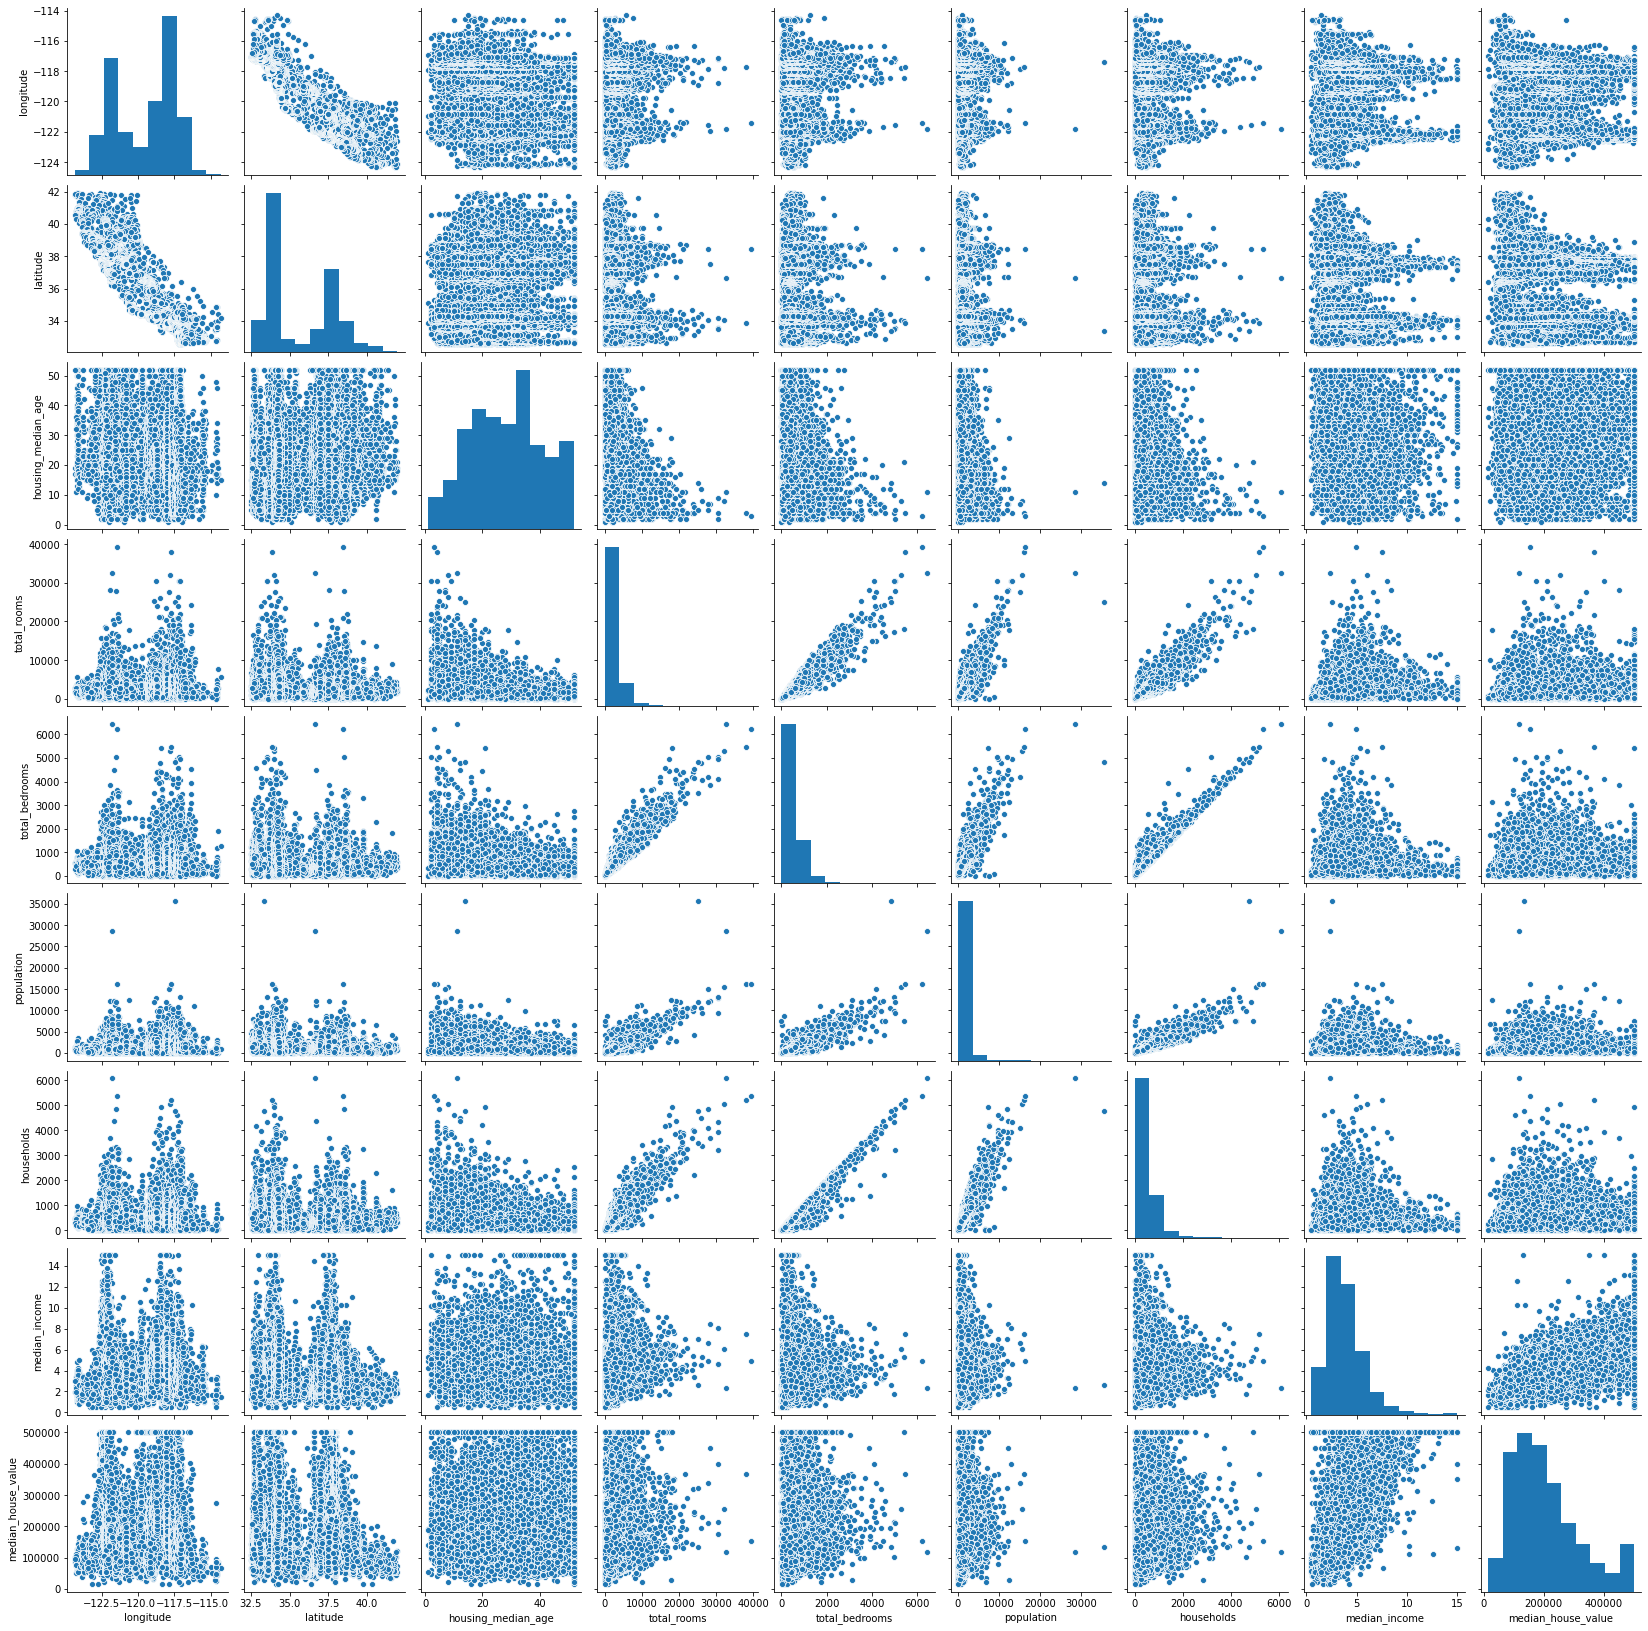

In [14]:
sns.pairplot(data=df, kind = 'scatter')
plt.show()

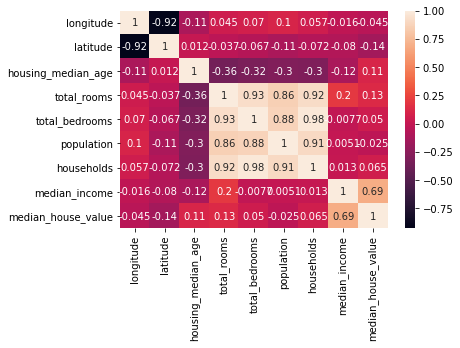

In [15]:
sns.heatmap(df.corr(), fmt = '0.2g', annot=True)
plt.show()

Splitting the datasets

In [16]:
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=200)

Applying random forest algorithm

In [18]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [19]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [20]:
y_pred = model.predict(X_test)

In [21]:
model.score(X_train, y_train)

0.9741201412388829

In [27]:
model.score(X_test, y_test)

0.8225844260523012

In [22]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [26]:
print(classification_report(y_test, y_pred.round()))
print(confusion_matrix(y_test, y_pred.round()))

              precision    recall  f1-score   support

     14999.0       0.00      0.00      0.00         1
     26900.0       0.00      0.00      0.00         1
     28300.0       0.00      0.00      0.00         1
     34600.0       0.00      0.00      0.00         1
     37500.0       0.00      0.00      0.00         3
     38800.0       0.00      0.00      0.00         1
     39600.0       0.00      0.00      0.00         1
     40000.0       0.00      0.00      0.00         2
     40400.0       0.00      0.00      0.00         1
     40900.0       0.00      0.00      0.00         1
     41400.0       0.00      0.00      0.00         1
     42500.0       0.00      0.00      0.00         2
     42600.0       0.00      0.00      0.00         1
     43100.0       0.00      0.00      0.00         1
     43300.0       0.00      0.00      0.00         1
     43600.0       0.00      0.00      0.00         1
     44400.0       0.00      0.00      0.00         1
     45000.0       0.00    